In [115]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
import json

import datetime as dt

In [2]:
fname = 'sp-pos-quot-dep-2021-03-28-19h20-reg-processed.csv'
d = pd.read_csv(fname, sep = ';', parse_dates = ['jour'])
d.sample(3)

reg       jour  cl_age90   P    T       pop  incidence  \
10837  Centre-Val de Loire 2020-06-16        19   0   53  314164.0   0.000000   
23726      Hauts-de-France 2021-01-22        90  46  632   63751.0  72.155731   
7580              Bretagne 2020-07-07         9   0  291  356171.0   0.000000   

       positivite  incidence hebdo  
10837    0.000000         0.954915  
23726    7.278481       514.501733  
7580     0.000000         0.842292

In [3]:
fname = 'sp-pos-quot-dep-2021-03-28-19h20-nat-processed.csv'
dnat = pd.read_csv(fname, sep = ';', parse_dates = ['jour'])
dnat.sample(3)

jour  cl_age90     P      T           pop  incidence  positivite  \
2216 2020-11-30        49  2288  32289  8.592886e+06  26.626677    7.086005   
1984 2020-11-09        39  6571  55129  8.295372e+06  79.212844   11.919317   
1997 2020-11-10        59  5376  47940  8.792675e+06  61.141804   11.214018   

      incidence hebdo  
2216       124.754358  
1984       462.354194  
1997       411.035333

In [4]:
d.dtypes

reg                        object
jour               datetime64[ns]
cl_age90                    int64
P                           int64
T                           int64
pop                       float64
incidence                 float64
positivite                float64
incidence hebdo           float64
dtype: object

In [5]:
regs = d['reg'].unique()
ages = d['cl_age90'].unique()

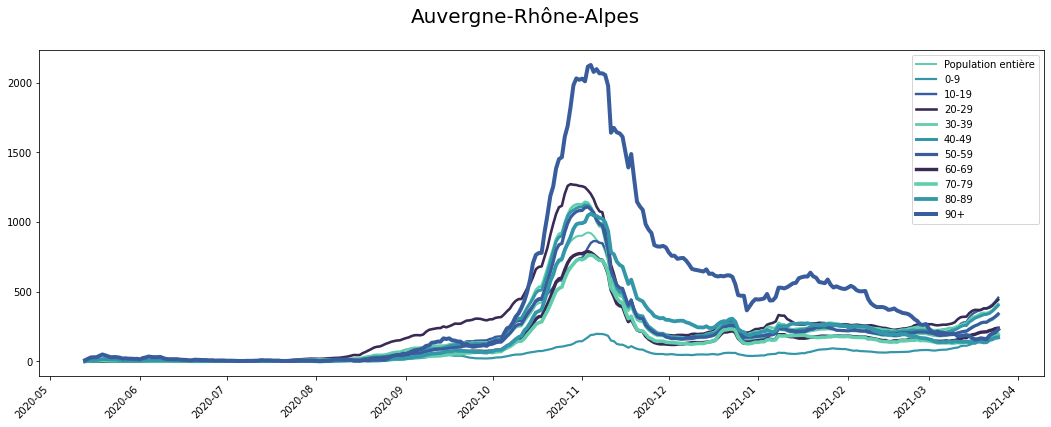

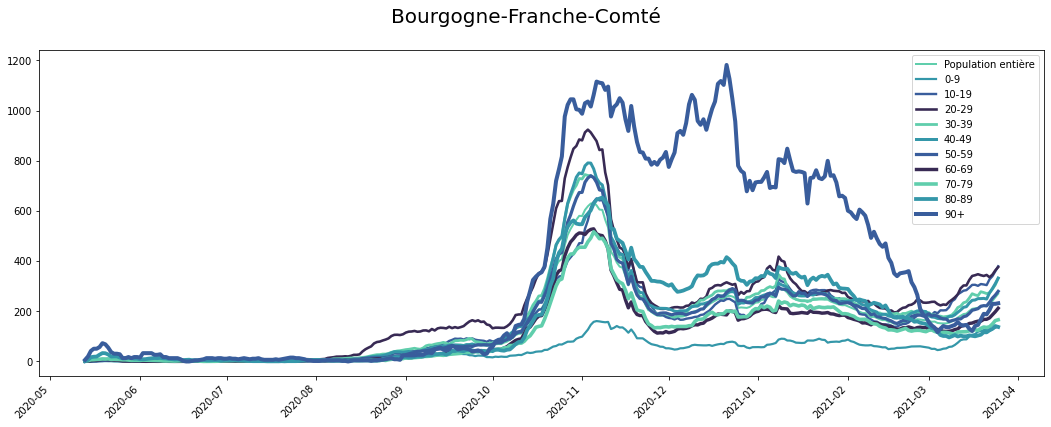

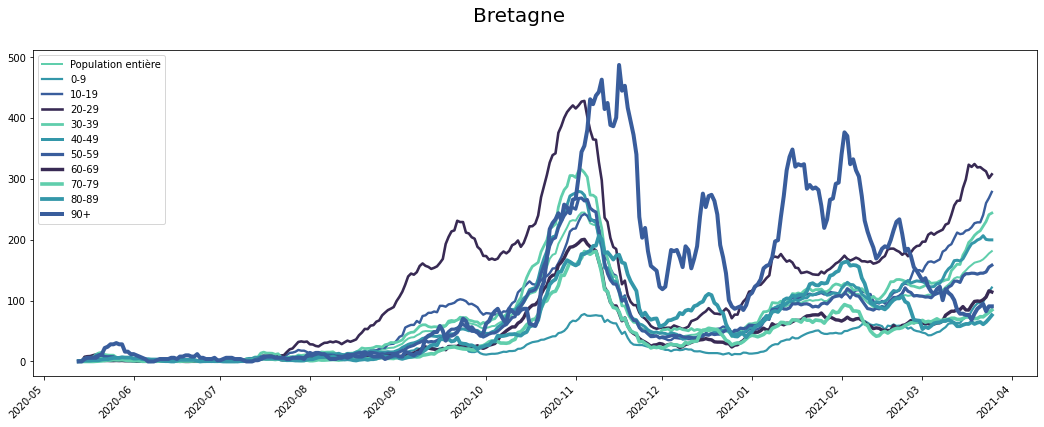

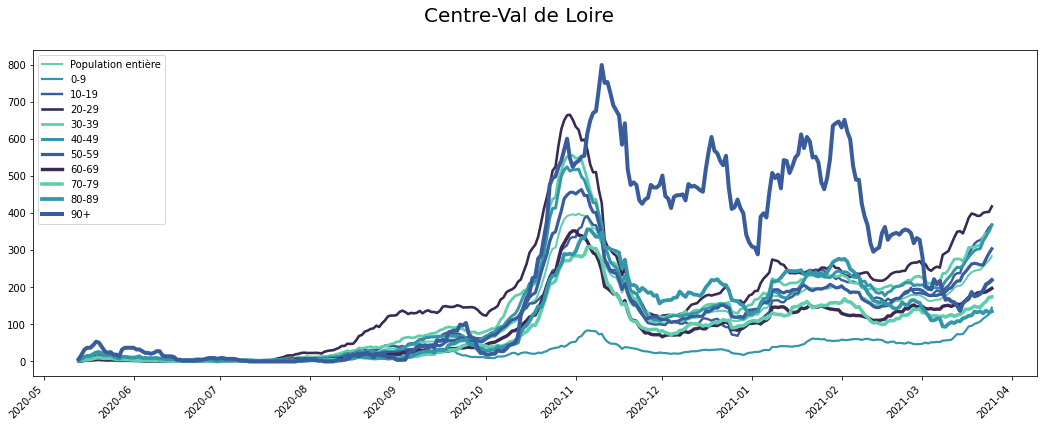

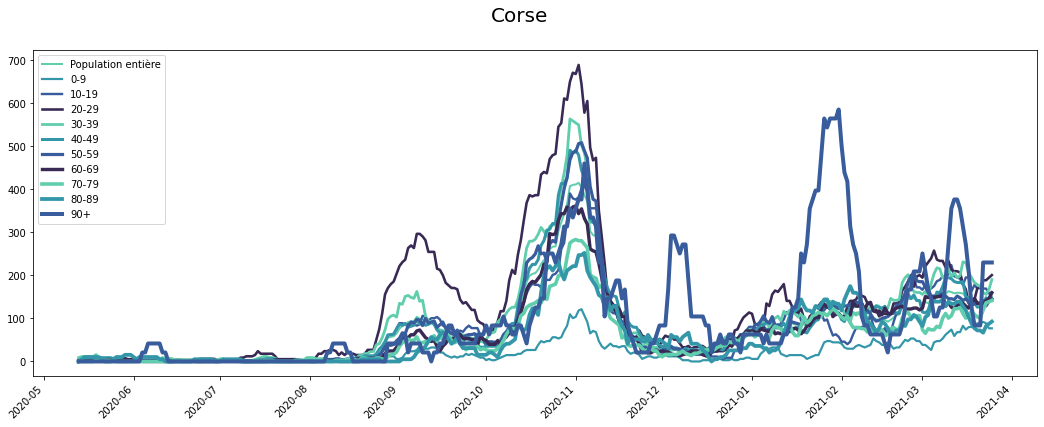

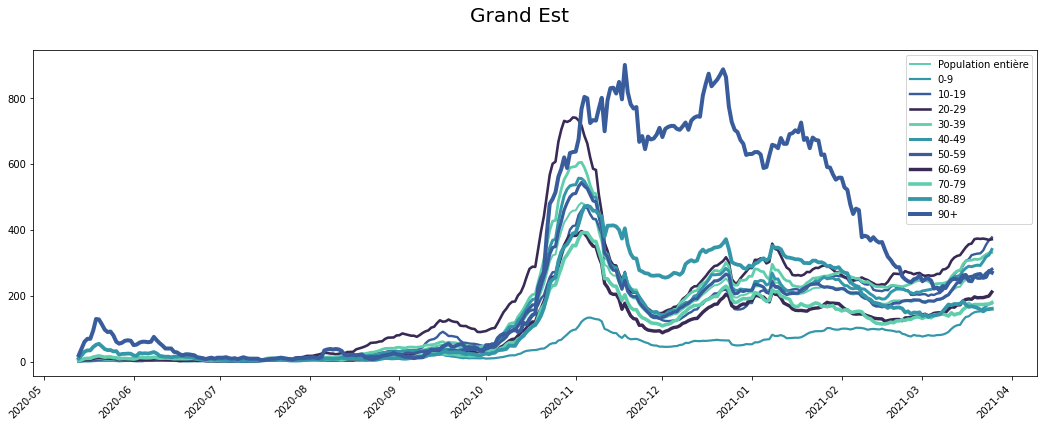

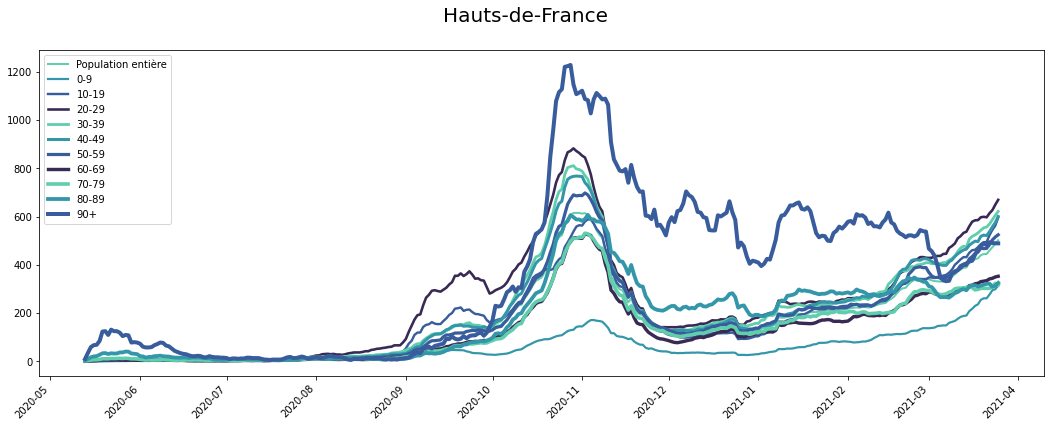

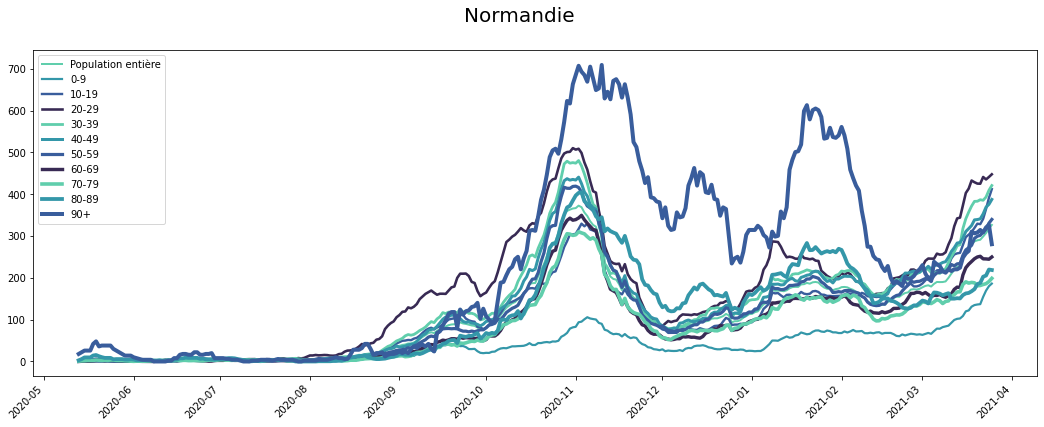

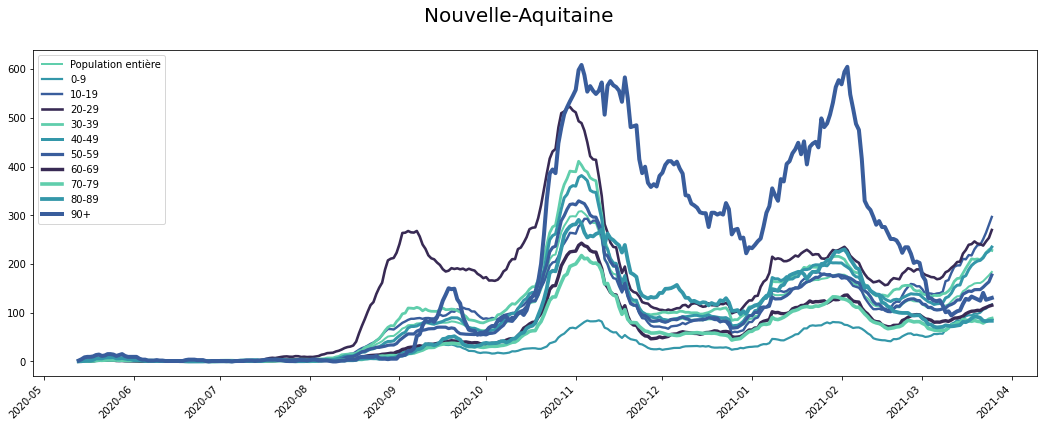

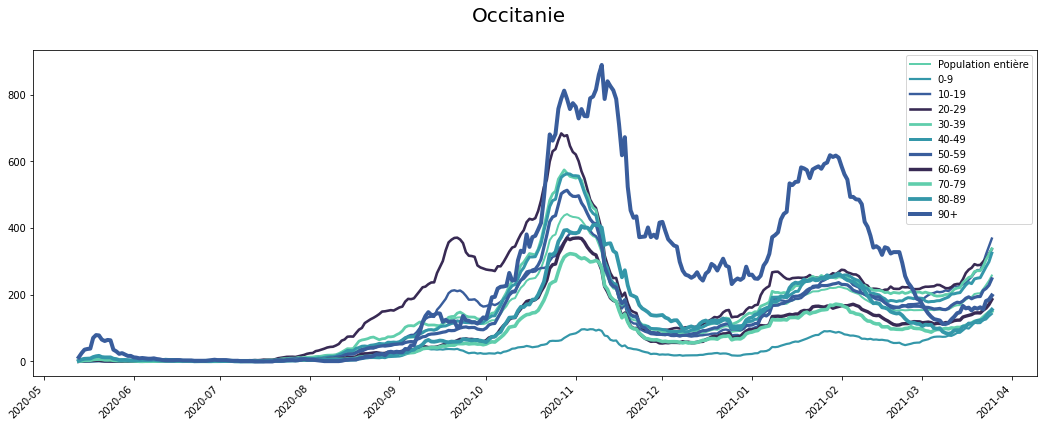

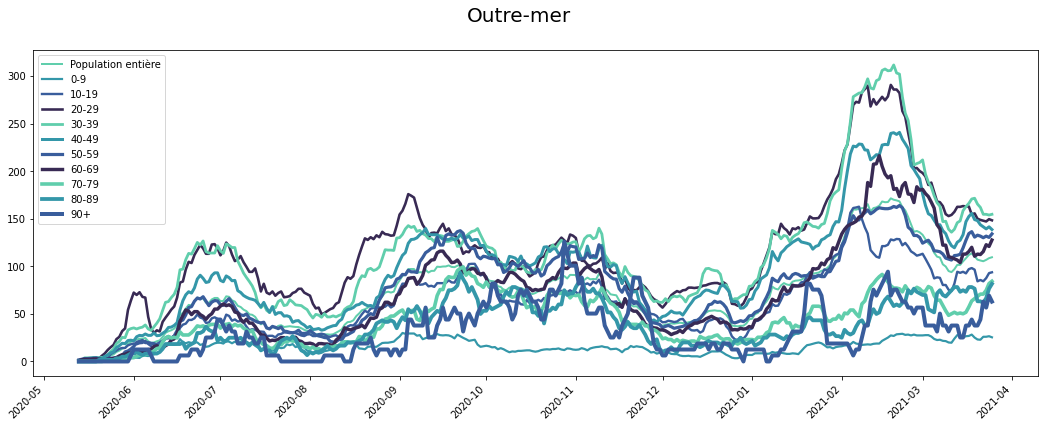

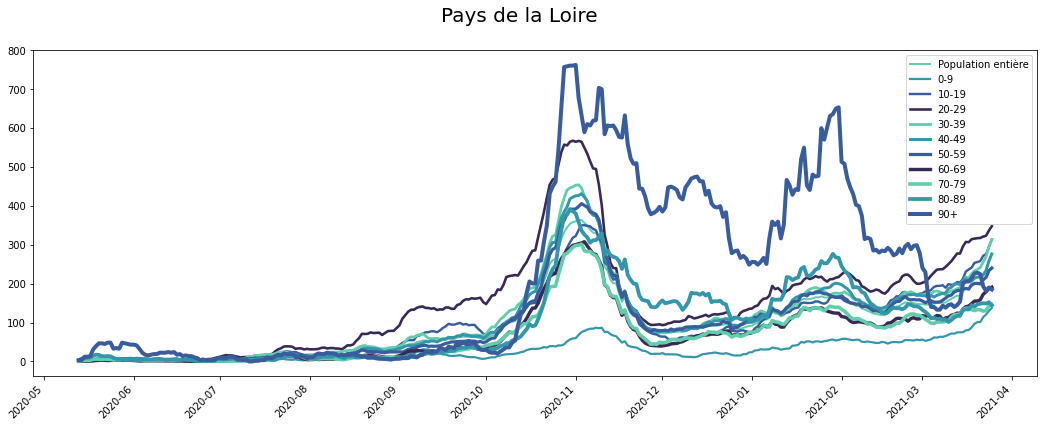

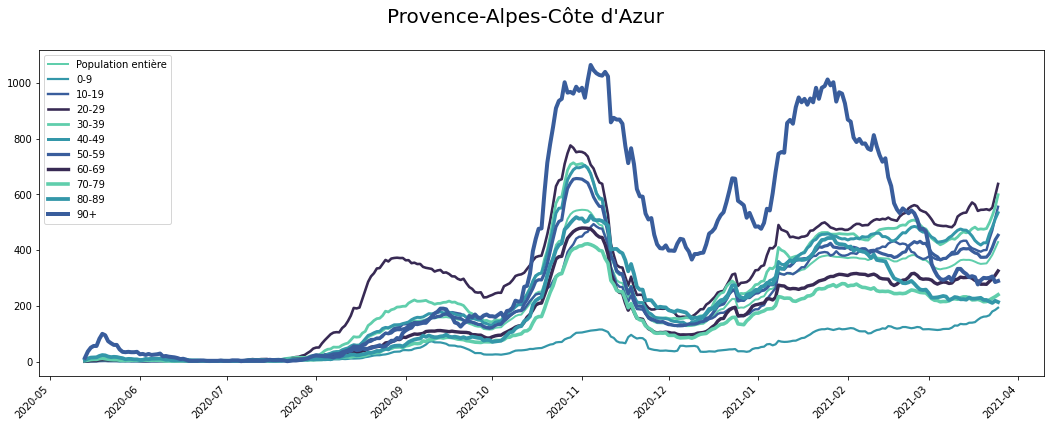

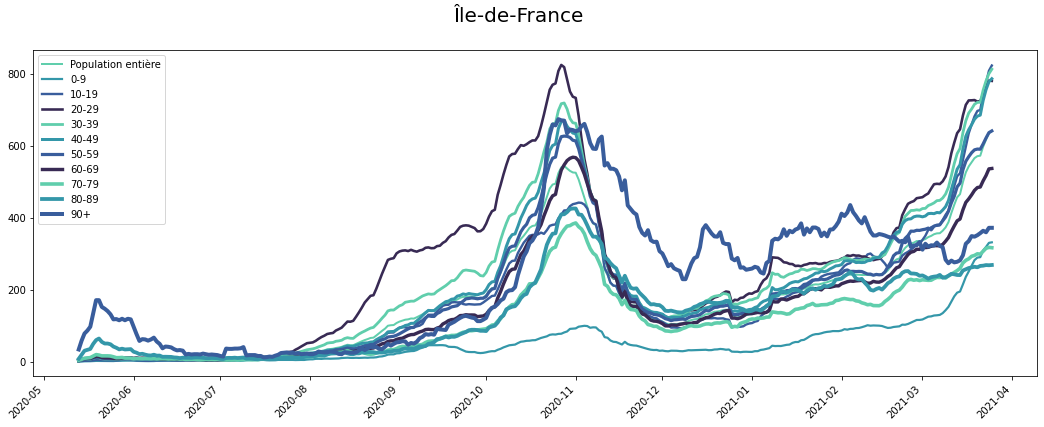

In [6]:
for reg in regs:
    dplot = d[d.reg == reg]
    label = {0 : 'Population entière',
            9: '0-9',
            19: '10-19',
            29: '20-29',
            39: '30-39',
            49: '40-49',
            59: '50-59',
            69: '60-69',
            79: '70-79',
            89: '80-89',
             90: '90+'
            }
    fig = plt.figure(figsize = (18,6))
    palette = sns.set_palette("mako_r",4)
    for i, age in enumerate(ages):
        dplot2 = dplot.loc[d.cl_age90 == age]
        plt.plot(dplot2.jour, dplot2["incidence hebdo"], label = label[age], linewidth = 2 + i * 0.2)
    plt.legend()
    plt.xticks(rotation=45, ha='right')
    fig.suptitle(reg, fontsize = 20)
# fig.savefig("fig1.jpg", pad_inches = 0)

In [179]:
def format_graph(ax, first = False):
    
    ax.set_ylim(-100,999)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.patch.set_alpha(0)
    
    ax.axvline(dt.datetime(2021, 1, 1), 
               ymin = 0.05, ymax = 0.85, 
               c = 'black', 
               linewidth = 1,
               linestyle = ':')
    
    if first:
        ax.legend(bbox_to_anchor=[1.55, .5], 
              loc='center',
              labelspacing=0.5,       
              handlelength=2, 
              handletextpad=0.5,
              frameon=True,
              fontsize = 14,
              title = 'Incidence hebdomadaire\n(pour 100 000 habitants)',
              title_fontsize = 12,
              )
        
   
    if first:
        ax.tick_params(axis='y', left = False,
                   labelsize = 12)
        ax.tick_params(axis='x', bottom = True,
                   labelsize = 8)
#         ax.xaxis.set_label_position('top')
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        newlabels = ['mai', 'juin', 'juillet', 'août', 
                 'septembre', 'octobre', 'novambre', 'décembre', 
                 'janvier', 'février', 'mars', 'avril']
        ax.set_xticklabels(newlabels)
        ax.grid(axis = 'y')
        
    if not first:
#         ax.get_xaxis().set_visible(False)
#         ax.get_yaxis().set_visible(False)
        ax.tick_params(axis='y', left = False)
        ax.grid(axis = 'y')
        ax.set_yticklabels([])
        
        ax.tick_params(axis='x', bottom = False)
        ax.set_xticklabels([])

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator


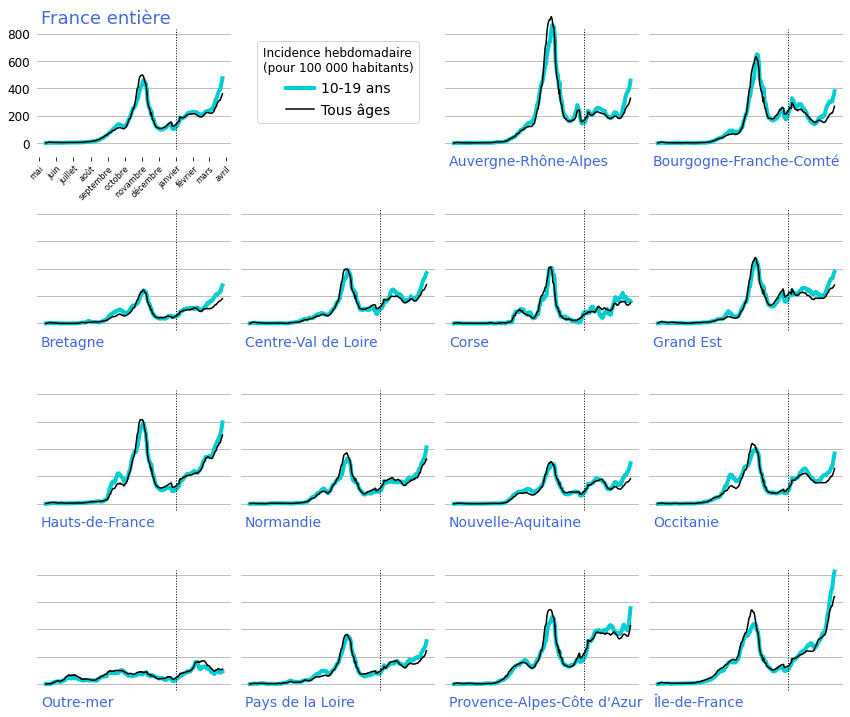

In [185]:
fig, axs = plt.subplots(4, 4, figsize = (14,12))
axs = axs.ravel()


ax = axs[0]

dplot = dnat.loc[dnat.cl_age90 == 19]
ax.plot(dplot.jour, dplot["incidence hebdo"], c = "darkturquoise", linewidth = 4, label = '10-19 ans')

dplot = dnat.loc[dnat.cl_age90 == 0]
ax.plot(dplot.jour, dplot["incidence hebdo"], c = "black", label = 'Tous âges')

format_graph(ax, first = True)
ax.set_title('France entière', x = 0.02, y = 0.85, loc = 'left', fontsize = 18, c = 'royalblue')
# ax.set_title('Incidence hebdomadaire\n(pour 100 000 habitants)', x = 1.6, y = 0.65, loc = 'center')

ax = axs[1]
ax.set_axis_off() 


for i, reg in enumerate(regs):
    
    ax = axs[i+2]
    
    sns.set_palette("mako",2)
    
    dplot = d.loc[d.reg == reg].loc[d.cl_age90 == 19]
    ax.plot(dplot.jour, dplot["incidence hebdo"], c = "darkturquoise", linewidth = 4)
    
    dplot = d.loc[d.reg == reg].loc[d.cl_age90 == 0]
    ax.plot(dplot.jour, dplot["incidence hebdo"], c = "black")
    
    format_graph(ax)

    ax.set_title(reg, x = 0.02, y = -0.1, loc = 'left', fontsize = 14, c = 'royalblue')


fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.05, 
                    hspace=0.2)
fig.savefig("fig3.pdf", pad_inches = 0)
